<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-09 21:00:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  82.9MB/s    in 2.4s    

2025-07-09 21:00:23 (82.9 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


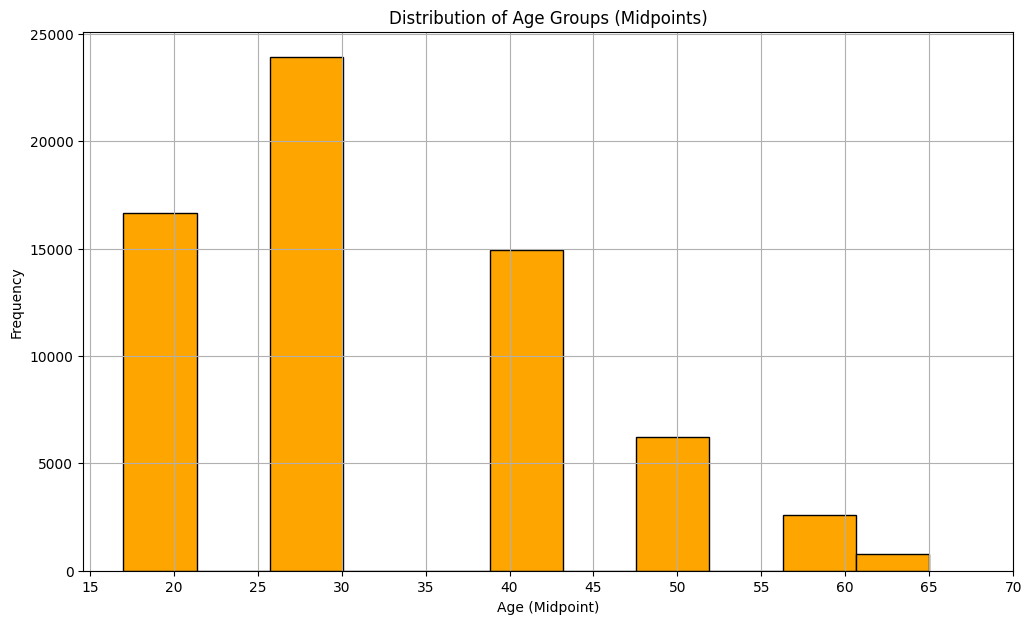

In [8]:
# your code goes here

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database     
conn = sqlite3.connect("survey-results-public.sqlite")

# Query to fetch Age column (ensure this matches your database schema)
query_age = """
SELECT Age 
FROM main
WHERE Age IS NOT NULL;
"""
df_age = pd.read_sql_query(query_age, conn)

# Map age ranges to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65
}

# Create new column
df_age['AgeMapped'] = df_age['Age'].map(age_map)

# Drop rows that couldn't be mapped (e.g. "Prefer not to say")
df_age = df_age.dropna(subset=['AgeMapped'])

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.hist(df_age['AgeMapped'], bins=11, edgecolor='black', color='orange')
plt.title("Distribution of Age Groups (Midpoints)")
plt.xlabel("Age (Midpoint)")
plt.ylabel("Frequency")
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.grid(True)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


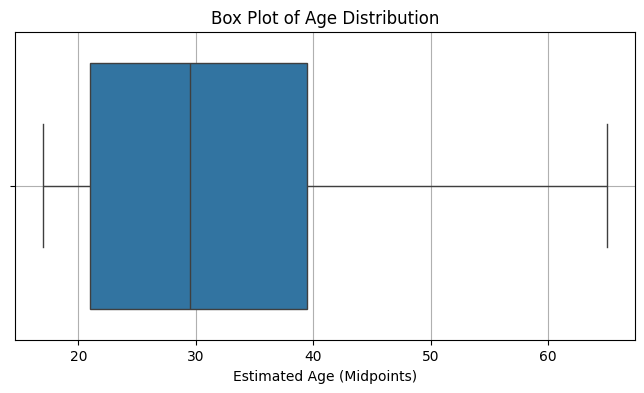

In [9]:
# your code goes here
!pip install seaborn
import seaborn as sns

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load Age data
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

# Map age ranges to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65,
}

# Convert age ranges to numeric midpoints
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows where age couldn't be mapped
df_clean = df.dropna(subset=['AgeNumeric'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['AgeNumeric'])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Estimated Age (Midpoints)')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_2542/1169466586.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comptotal_age['Age'].replace('Prefer not to say', np.nan, inplace=True)


<Figure size 1000x600 with 0 Axes>

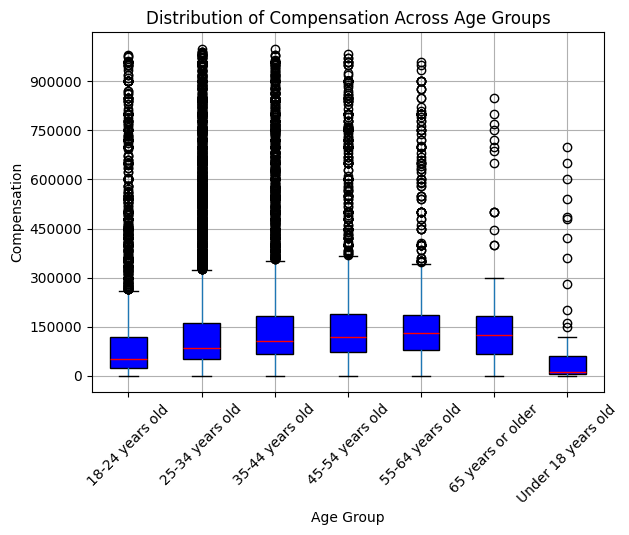

In [10]:
# your code goes here

!pip install numpy
import numpy as np

from matplotlib.ticker import ScalarFormatter, MaxNLocator

# Query to fetch Age and Compensation data
QUERY = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df_comptotal_age = pd.read_sql_query(QUERY, conn)

# Replace 'Prefer not to say' with NaN and drop rows with NaN values
df_comptotal_age['Age'].replace('Prefer not to say', np.nan, inplace=True)
df_comptotal_age.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Mapping age groups
age_group_labels = {
    "25-34 years old": "25-34 years old",
    "35-44 years old": "35-44 years old",
    "18-24 years old": "18-24 years old",
    "45-54 years old": "45-54 years old",
    "55-64 years old": "55-64 years old",
    "Under 18 years old": "Under 18 years old",
    "65 years or older": "65 years or older"
}

# Add Age Group labels
df_comptotal_age['AgeGroup'] = df_comptotal_age['Age'].map(age_group_labels)

# Remove unrealistic values
df_comptotal_age = df_comptotal_age[df_comptotal_age['CompTotal'] < 1_000_000]

# Visualize compensation distribution across age groups
plt.figure(figsize=(10, 6))
ax = df_comptotal_age.boxplot(column='CompTotal', by='AgeGroup', vert=True, patch_artist=True, 
                              boxprops=dict(facecolor='blue', color='black'), 
                              medianprops=dict(color='red'))

plt.title('Distribution of Compensation Across Age Groups')
plt.suptitle('')  # To remove the default title generated by pandas
plt.xlabel('Age Group')
plt.ylabel('Compensation')

# Clean X Axis
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)

plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


[ 65.    0.   20.   30.   25.   50.   10.    5.   15.   18.   40.   35.
  33.   80.  100.    2.   90.   45.   34.   16.   70.    7.   85.   60.
   1.    9.   14.   31.   12.   11.   23.   28.   75.    8.   81.    6.
  13.   55.    3.   22.   42.    4.   89.   99.   12.5  36.   27.   17.
  95.   21.   24.   19.   87.   88.   29.   33.3  37.   39.   77.   68.
  26.   32.   66.   82.   94.   78.   61.   43.   69.   73.   17.5  46.
  49.   52.   97.   96.   67.   91.   86.   56.   98.   41.   74.   51.
  76.   48.   44.   64.   54.   63. ]


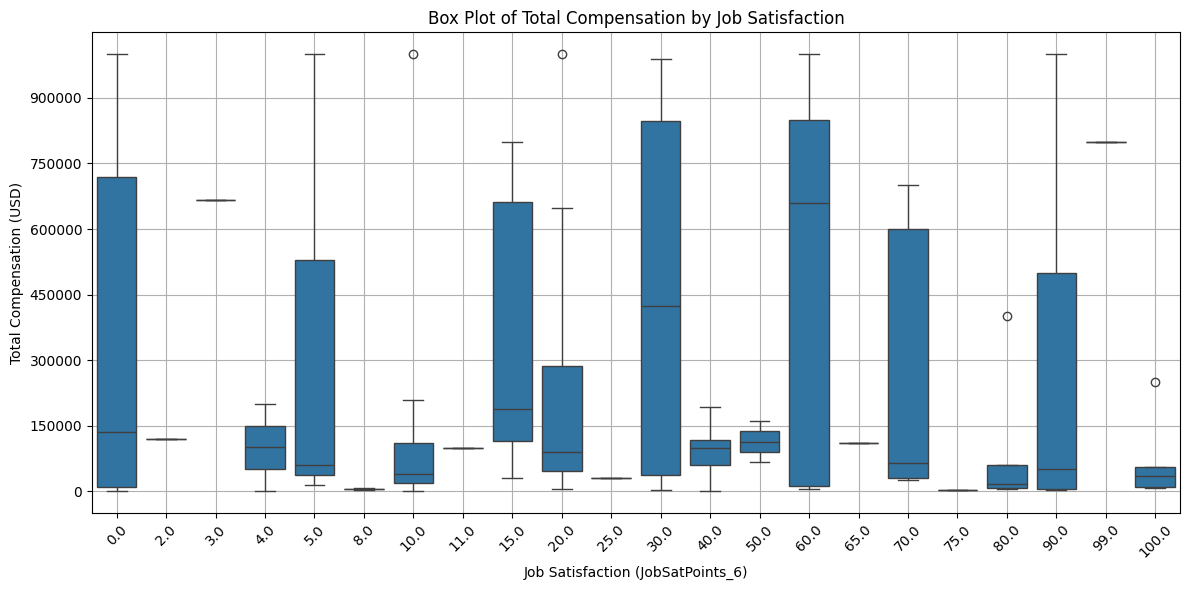

In [11]:
# your code goes here
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator

# Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load data
query = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Check unique job satisfaction values
print(df['JobSatPoints_6'].unique())

# Assume CompTotal is in thousands → convert to USD
df['CompTotal'] = df['CompTotal'] * 1000

# Filter compensation for a realistic range
df = df[(df['CompTotal'] >= 1000) & (df['CompTotal'] <= 1000000)]

# Plot box plot grouped by Job Satisfaction
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
plt.title('Box Plot of Total Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)

# Format y-axis
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


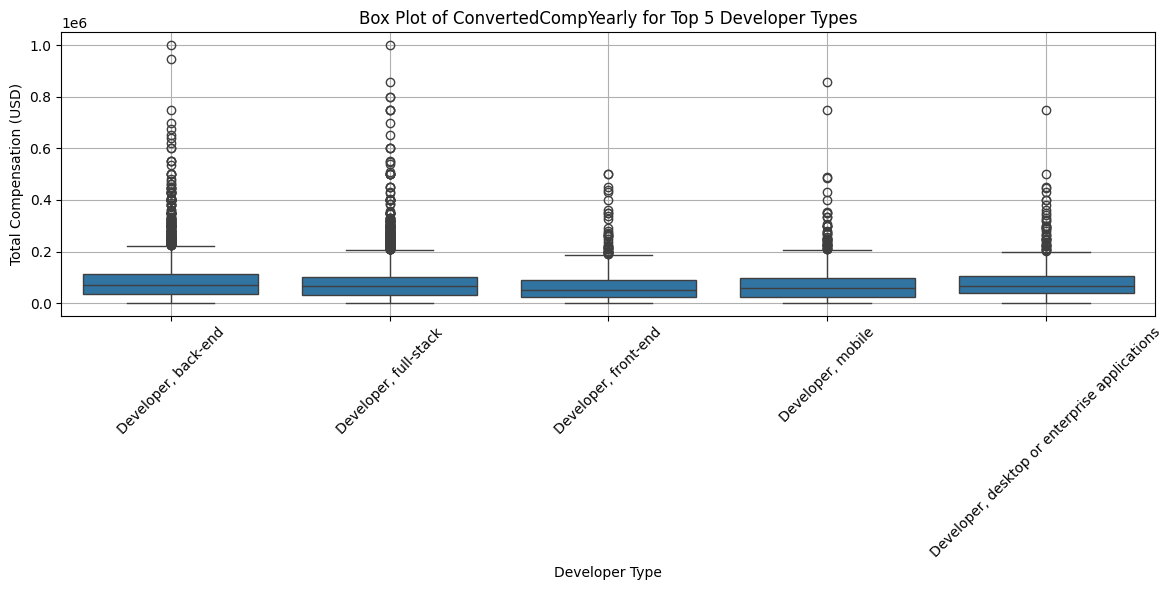

In [12]:
# your code goes here

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load DevType and ConvertedCompYearly
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Convert 'ConvertedCompYearly' to numeric (in case there are issues)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows where conversion failed or compensation is null
df = df.dropna(subset=['ConvertedCompYearly'])

# Expand semicolon-separated DevTypes into multiple rows
df_expanded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df_expanded['DevType'] = df_expanded['DevType'].str.strip()

# Get top 5 most common DevTypes
top5_devtypes = df_expanded['DevType'].value_counts().nlargest(5).index.tolist()

# Filter dataframe for only top 5 DevTypes
df_top5 = df_expanded[df_expanded['DevType'].isin(top5_devtypes)]

# Filter compensation to a realistic range (1k to 1M USD)
df_top5 = df_top5[(df_top5['ConvertedCompYearly'] >= 1000) & (df_top5['ConvertedCompYearly'] <= 1000000)]

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5)
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


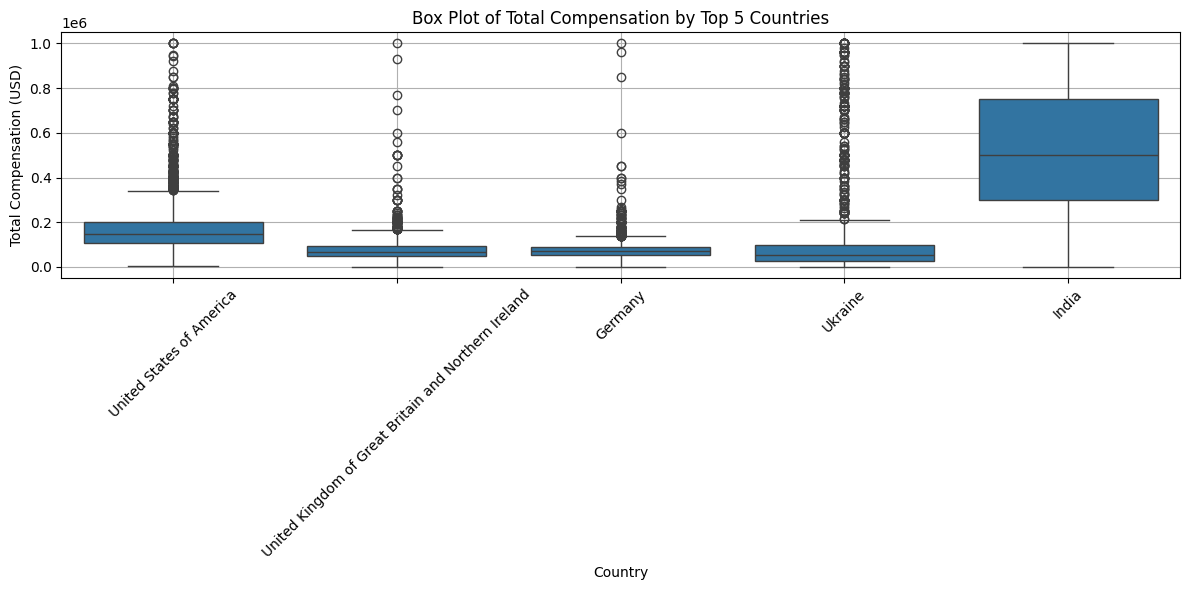

In [13]:
# your code goes here

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Query to get CompTotal and Country where neither is NULL
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric if needed (just in case)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with missing or zero compensation
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]

# Convert CompTotal to USD if needed (check if values are decimals or actual USD)
# If in thousands (like 50.0 meaning 50k), multiply by 1000
if df['CompTotal'].max() < 10000:  # heuristic
    df['CompTotal'] = df['CompTotal'] * 1000

# Find top 5 countries by count of responses
top5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Filter data to only top 5 countries
df_top5 = df[df['Country'].isin(top5_countries)]

# Filter compensation to reasonable range (e.g., 1k to 1M USD)
df_top5 = df_top5[(df_top5['CompTotal'] >= 1000) & (df_top5['CompTotal'] <= 1000000)]

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top5)
plt.title('Box Plot of Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


['Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Employed, part-time'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Retired'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Not employed, but looking for work' 'Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Not employed, but looking for work'
 'Employed, full-time;Retired'
 'Independent contractor, freelancer, or self-employed;Retired'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed

/tmp/ipykernel_2542/589504696.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


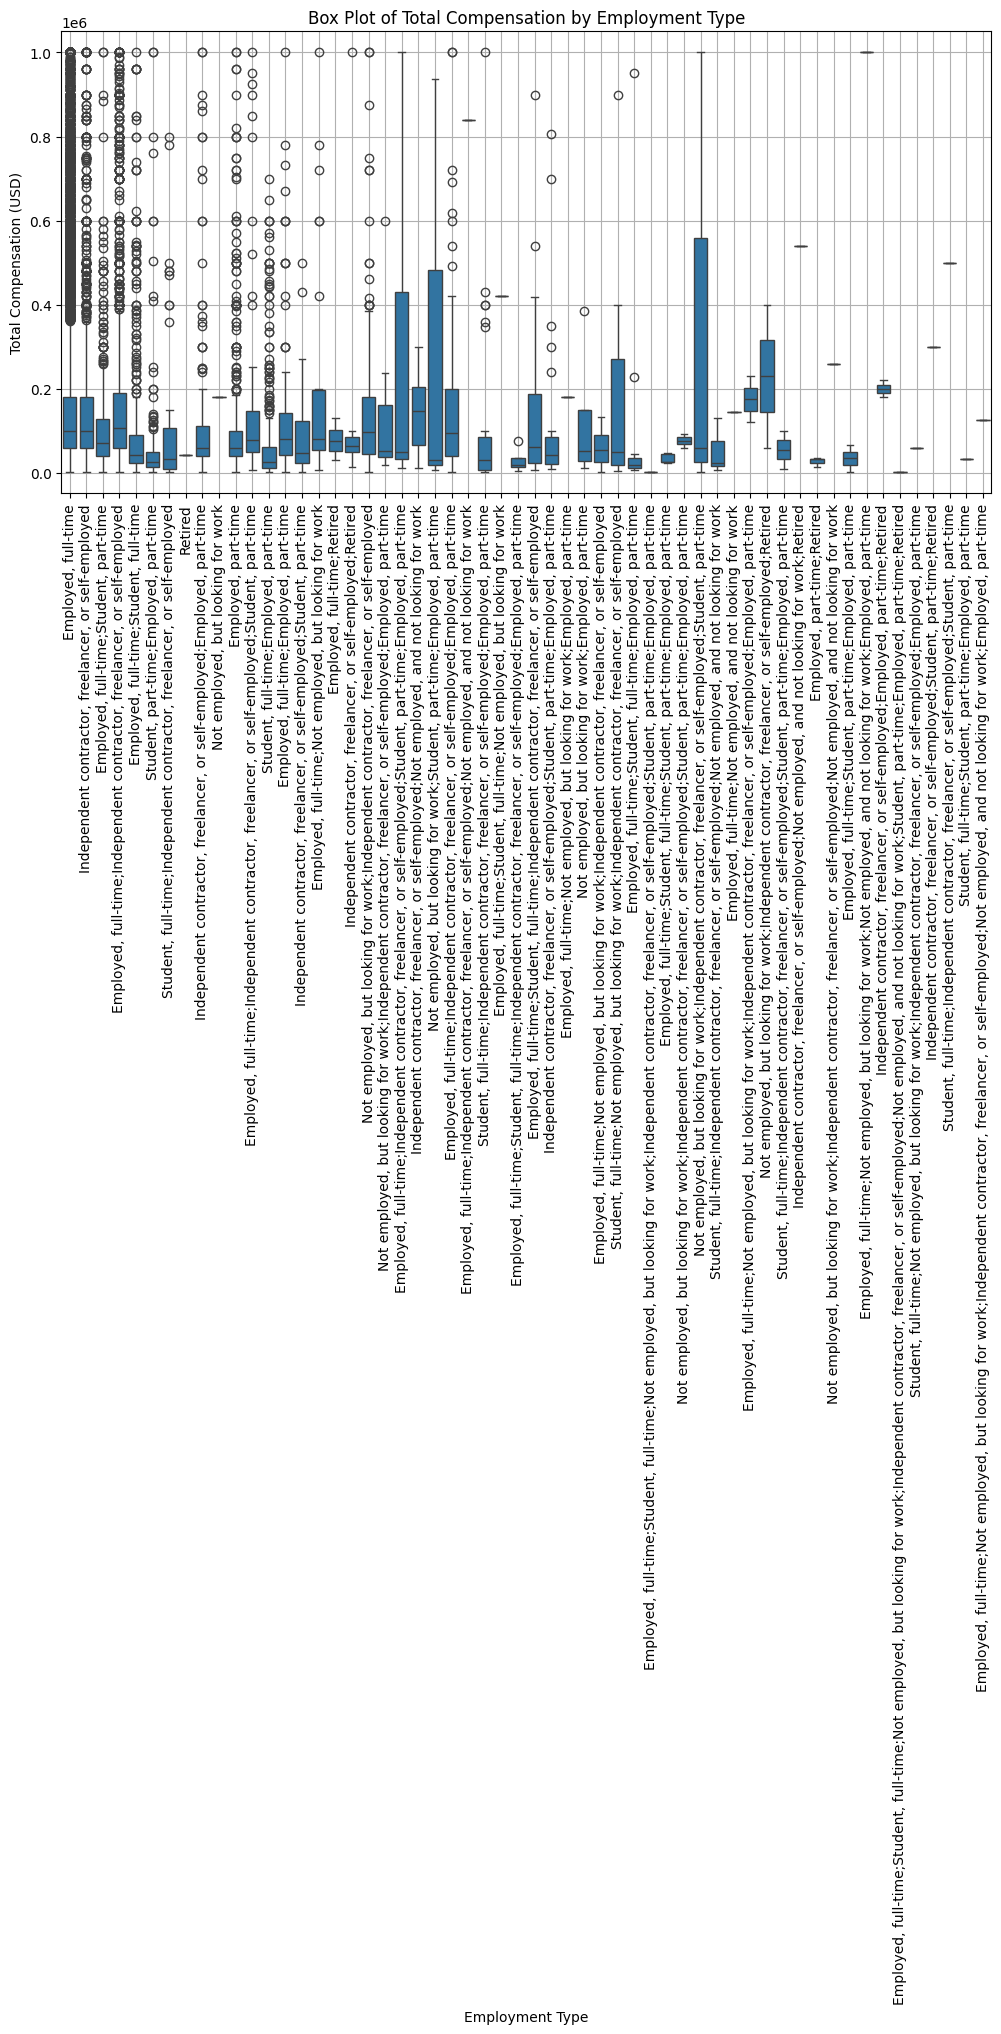

In [14]:
# your code goes here

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Query to get CompTotal and Employment type, excluding NULLs
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric (if necessary)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['CompTotal'])

# Convert CompTotal to USD if needed (check max value heuristic)
if df['CompTotal'].max() < 10000:  # likely in thousands
    df['CompTotal'] = df['CompTotal'] * 1000

# Filter for reasonable compensation values
df = df[(df['CompTotal'] >= 1000) & (df['CompTotal'] <= 1000000)]

# Optional: Check unique Employment types
print(df['Employment'].unique())

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal', data=df)
plt.title('Box Plot of Total Compensation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


[  0.    30.    60.    20.    25.    50.    15.    10.     5.    80.
 100.    65.     8.    90.    75.    35.    40.    33.    70.    17.
   7.    12.    13.     9.    21.    18.     2.    45.    34.    16.
  78.    85.     1.    14.    31.    11.    23.    28.    81.     6.25
   6.    55.     3.    22.    42.     4.    89.    95.    36.    27.
  24.    19.    87.    88.    29.    33.33  33.3   37.    39.    77.
  68.    26.    98.    32.    99.    66.    57.    82.    12.5   94.
  61.    43.    69.    76.    73.    17.5   46.    49.    52.    97.
  96.    67.    91.    86.    56.    41.    74.    51.    48.    44.
  64.    54.    63.  ]


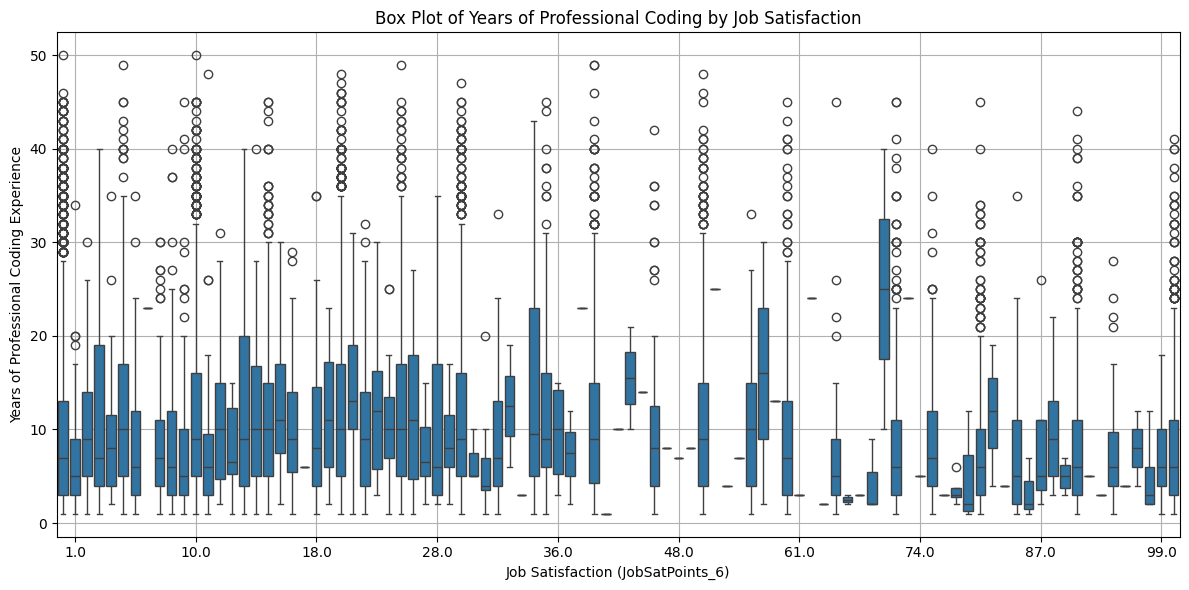

In [15]:
# your code goes here

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Query to fetch YearsCodePro and JobSatPoints_6 (exclude NULLs)
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric (in case of string data)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop any rows where conversion failed or missing
df = df.dropna(subset=['YearsCodePro'])

# Optional: Check unique values in JobSatPoints_6
print(df['JobSatPoints_6'].unique())

# Filter for realistic YearsCodePro values (e.g., 0 to 50 years)
df = df[(df['YearsCodePro'] >= 0) & (df['YearsCodePro'] <= 50)]

# Plot box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)

# Set x-axis ticks: from 1 to 100 in steps of 10
ax.set_xticks(np.arange(1, 101, 10))  # [1, 11, 21, ..., 91]

# Labels and grid
plt.title('Box Plot of Years of Professional Coding by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
